<a href="https://colab.research.google.com/github/jjschueder/7331DataMiningNotebooks/blob/master/lab3/Lab3_Daniel_Jeff_Armando_Joe_small_spectral_DCversion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Mining 7331 - Spring 2020**

DUE APRIL 12th (sunday)



* jw - update data understanding 1, 2.  
  * Update doc contents.  Start on pair wise clustering for liquor type and sales, store type and sales (covariance table - 90% related) cluster based on data understanding (to_keep section).  From lab 2, do the most imporant ones (bottle_volume_ml, bottle_cost, cost_per_liter) and then do all 10 using knn.  Use lab 1 visualization for scatterplots for liquior types.  Then look at clusters. s&s pair plot, lab 1 - go against normalize data

  * sns.pairplot(dfenc, height=3, hue= 'liquor_category', vars = ['state_bottle_retail', 'sale_dollars', 'bottles_sold', 'volume_sold_liters'])

  * plot the correlation matrix using seaborn

  * https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

  * drop the counter attribute as that was used above when dealing with missing values
del df['counter']

  * show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(df.corr(), cmap=cmap, annot=True)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

* Daniel
  * send professtor about spectral - min num of datapoints needed
  * look into using dbscan - modifying params for better results

* Armando
  * looking into evaluating clusters - notebook 10
  * Business Understanding

* Joe
  * Agglomorative
  * Graph-based clustering






## Lab 3 -  Clustering, Association Rules, or Recommenders 

#### Daniel Clark, Joe Schueder, Jeff Washburn, Armando Vela

Final Team Project
CRISP-DM Capstone: Association Rule Mining, Clustering, or Collaborative Filtering  
In the final assignment for this course, you will be using one of three different analysis methods:  
• Option A: Use clustering on an unlabeled dataset to provide insight or features  
• Option B: Use transaction data for mining associations rules  
• Option C: Use collaborative filtering to build a custom recommendation system
Your choice of dataset will largely determine the task that you are trying to achieve, though the
dataset does not need to change from your previous tasks.  
• For example, you might choose to use clustering on your data as a preprocessing step that  
extracts different features. Then you can use those features to build a classifier and analyze
its performance in terms of accuracy (precision, recall) and speed.  
• Alternatively, you might choose a completely different dataset and perform rule mining or
build a recommendation system.
Dataset Selection and Toolkits
As before, you need to choose a dataset that is not small. It might be massive in terms of the
number of attributes (or transactions), classes (or items, users, etc.) or whatever is appropriate
for the task you are performing. Note that scikit-learn can be used for clustering analysis, but not
for Association Rule Mining (you should use R) or collaborative filtering (you should use
graphlabcreate from Dato). Both can be run using Jupyter notebooks as shown in lecture.  
• One example of a recommendation dataset is the movie lens rating data:
http://grouplens.org/ datasets/movielens/  
• Some examples of association rule mining datasets: http://fimi.ua.ac.be/data/
Write a report covering in detail all the steps of the project. The results need to be reproducible
using only this report. Describe all assumptions you make and include all code you use in the
Jupyter notebook or as supplemental functions. Follow the CRISP-DM framework in your
analysis (you are performing all of the CRISP-DM outline).  
This report is worth 20% of the final grade. 

## Business Understanding 1 (10 points)



Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). How will you measure the effectiveness of a good algorithm?
- look at class notebook on evaluating clusters (notebook 10 - cluster validity)

Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

## Data Understanding 1 (10 points)


Describe the meaning and type of data (scale, values, etc.) for each attribute in
the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are
those mistakes? How do you deal with these problems?

In [1]:
import pandas as pd

url_dataset = 'https://raw.githubusercontent.com/jjschueder/7331DataMiningNotebooks/master/Live%20Assignments/df1hotmerge2.csv'
data = pd.read_csv(url_dataset, nrows = 40000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 68 columns):
Unnamed: 0                  40000 non-null int64
pack                        40000 non-null int64
bottle_volume_ml            40000 non-null int64
state_bottle_cost           40000 non-null float64
state_bottle_retail         40000 non-null float64
bottles_sold                40000 non-null int64
sale_dollars                40000 non-null float64
volume_sold_liters          40000 non-null float64
volume_sold_gallons         40000 non-null float64
counter                     40000 non-null int64
liquor_category             40000 non-null object
store_parent                40000 non-null object
month                       40000 non-null object
year                        40000 non-null int64
monthyear                   40000 non-null object
liquor_category_AMARETTO    40000 non-null int64
liquor_category_BRANDY      40000 non-null int64
liquor_category_GIN         40000 non-null i

In [2]:
# Import all necessary libraries we will be using in our dataset

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
print(data.shape)
data.head()

(40000, 68)


,Unnamed: 0,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,counter,liquor_category,store_parent,month,year,monthyear,liquor_category_AMARETTO,liquor_category_BRANDY,liquor_category_GIN,liquor_category_LIQUEUR,liquor_category_Other,liquor_category_RUM,liquor_category_SCHNAPPS,liquor_category_TEQUILA,liquor_category_VODKA,liquor_category_WHISKY,store_parent_CVS,store_parent_Caseys,store_parent_Hy-Vee,store_parent_Kum&Go,store_parent_Other,store_parent_QuikTrip,store_parent_SamsClub,store_parent_SmokingJoes,store_parent_Target,store_parent_Wal-Mart,store_parent_Walgreens,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,year_2019,monthyear_Apr-2019,monthyear_Aug-2019,monthyear_Dec-2019,monthyear_Feb-2019,monthyear_Jan-2019,monthyear_Jul-2019,monthyear_Jun-2019,monthyear_Mar-2019,monthyear_May-2019,monthyear_Nov-2019,monthyear_Oct-2019,monthyear_Sep-2019,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,grossmargin
0,0,20,375,3.85,5.78,20,115.60,7.50,1.98,1,Other,Other,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.750136,15.413333,2.735233,1.348073,2.995732,2.014903,0.333910
1,1,8,50,8.75,13.13,1,13.13,0.05,0.01,1,Other,Other,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.574900,262.600000,5.570632,2.169054,0.000000,-2.995732,0.333587
2,2,12,1000,16.50,24.75,6,148.50,6.00,1.58,1,GIN,Hy-Vee,May,2019,May-19,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5.000585,24.750000,3.208825,2.803360,1.791759,1.791759,0.333333
3,3,6,750,21.17,31.76,24,762.24,18.00,4.75,1,WHISKY,Hy-Vee,Nov,2019,Nov-19,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.636261,42.346667,3.745890,3.052585,3.178054,2.890372,0.333438
4,4,6,1750,9.31,13.97,12,167.64,21.00,5.54,1,Other,Hy-Vee,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.121819,7.982857,2.077296,2.231089,2.484907,3.044522,0.333572


In [3]:
# Since we are predicting our liquor category type (opening to the entire list of categories and not just one), we can assign them a numerical value.

print (data['liquor_category'].unique())

"""df = pd.DataFrame({'col_1':[133,255,36,477,55,63]})
d = {'1':'M', '2': 'C', '3':'a', '4':'f', '5':'r', '6':'s'}
def ifef(col):
    col = str(col)
    return d[col[0]]

df['id_label'] = df['col_1'].apply(ifef)
print(df)"""

d = {'O':'1', 'G': '2', 'W':'3', 'T':'4', 'L':'5', 'V':'6', 'R':'7', 'S': '8', 'A':'9', 'B':'10'}

#data['id_label'] = data['liquor_category'].apply(ifef)

data['id_label'] = data['liquor_category'].astype(str).str[0].map(d)

print(data.head())

['Other' 'GIN' 'WHISKY' 'TEQUILA' 'LIQUEUR' 'VODKA' 'RUM' 'SCHNAPPS'
 'AMARETTO' 'BRANDY']
   Unnamed: 0  pack  ...  grossmargin  id_label
0           0    20  ...     0.333910         1
1           1     8  ...     0.333587         1
2           2    12  ...     0.333333         2
3           3     6  ...     0.333438         3
4           4     6  ...     0.333572         1

[5 rows x 69 columns]


In [0]:
# Create new variables using aggredate data on profit, total cost and revenue

#do some calculations for cost and profit
data['profit'] = data['state_bottle_retail']*data['bottles_sold'] - data['state_bottle_cost']* data['bottles_sold']
data['profit_trans']= np.log(data['profit'])

data['totalcost'] = data['state_bottle_cost']* data['bottles_sold']
data['totalcost_trans']= np.log(data['totalcost'])

data['revenue'] = data['state_bottle_retail']*data['bottles_sold']
data['revenue_trans']= np.log(data['revenue'])

data['bottle_volume_ml_trans']= np.log(data['bottle_volume_ml'])

data['pack_trans']= np.log(data['pack'])

## Data Understanding 2 (10 points)

Visualize any important attributes appropriately

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs

(40000, 11)


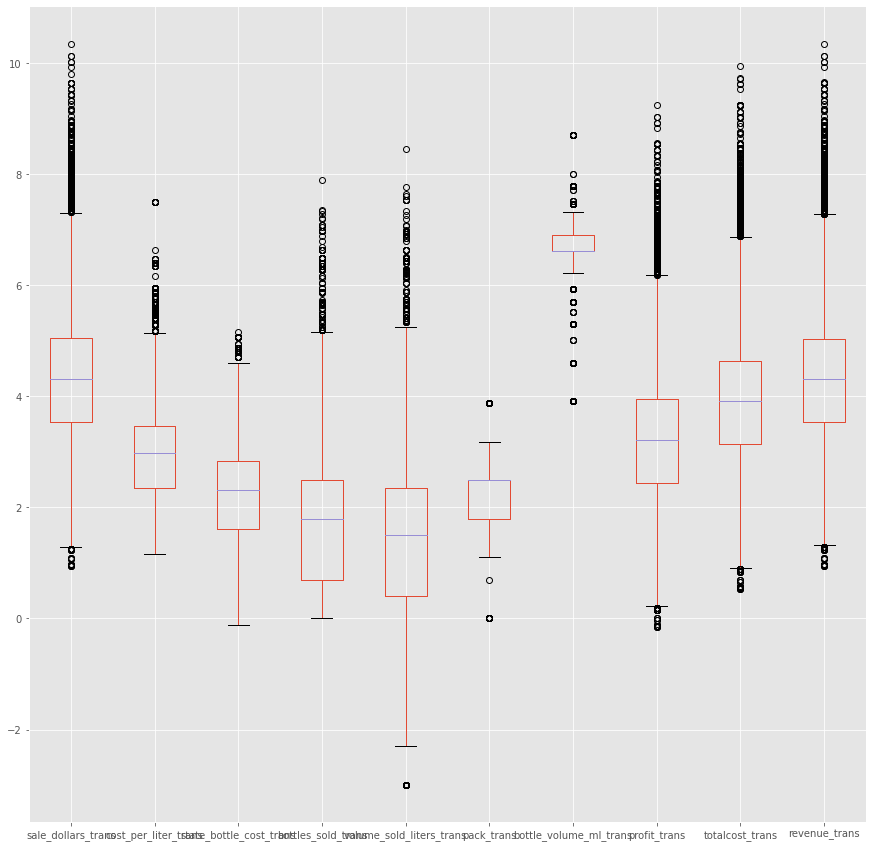

In [5]:
# Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data


# Remove unwanted columns, which include all the specific liquor categories, 
# except for liquor_category_WHISKY since that is what we want to classify on, along
# with all the store_ attributes
"""
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
"""
#keep our transformed detail, along with the timing and store name detail

to_keep=['sale_dollars_trans', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack_trans', 'bottle_volume_ml_trans', 
       'profit_trans', 'totalcost_trans', 'revenue_trans', 'id_label']
data_final=data[to_keep]
data_final.columns.values

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = data_final.boxplot()
#ax.set_yscale('log')

print(data_final.shape)

In [6]:
data_final.head()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack_trans,bottle_volume_ml_trans,profit_trans,totalcost_trans,revenue_trans,id_label
0,4.750136,2.735233,1.348073,2.995732,2.014903,2.995732,5.926926,3.653252,4.343805,4.750136,1
1,2.574900,5.570632,2.169054,0.000000,-2.995732,2.079442,3.912023,1.477049,2.169054,2.574900,1
2,5.000585,3.208825,2.803360,1.791759,1.791759,2.484907,6.907755,3.901973,4.595120,5.000585,2
3,6.636261,3.745890,3.052585,3.178054,2.890372,1.791759,6.620073,5.537964,6.230639,6.636261,3
4,5.121819,2.077296,2.231089,2.484907,3.044522,1.791759,7.467371,4.023922,4.715996,5.121819,1


In [7]:
data_final = data_final[data_final['id_label'] < "8"]
data_final = data_final[data_final['id_label'] != "10"]
data_final['id_label'].value_counts()

6    13108
3     9045
7     5515
5     5360
4     2853
1     2386
2     1716
Name: id_label, dtype: int64

## Modeling and Evaluation 1 (10 points)

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:

Train and adjust parameters (10 Points)
• Train: Perform cluster analysis using several clustering methods (adjust parameters).  

+++

For this data, we will be attempting to cluster our data on the basis of the liquor type that we classified against in lab 2, and apply that cluster into our classifier model as an an additional feature that could strengthen our classifier. Ad described in our business understanding section, our dataset consists of a number of features that can track the sales and records of purchases made in the state of Iowa from wholesaler to retailer. This can include quantanty detail on how much alcohol was sold during the purchase, how much the sale was for, how much profit was made, and other additional features slicing and dicing those details. The dataset includes all of 2019 data and tracks sales all over the state of Iowa. 

Our goal with the cluster is to cluster each data point based on which of the 7 possible liquor types corresponding to it. Each record in the dataset has been formatted dso that it represents a single sale between liquor retailer and wholealer. The liquor type varies by each instance and can represent a wide variety of sale sizes and prices, so we will need to use a clustering algorithm without a known liquor type for each designation. To do this, we will attempt to cluster with 7 total clusters defined by 3 different clustering algorithm corresponding with each of the liquor types present. We will begin the analysis of all observations aggregated together:

In [8]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

cv = StratifiedKFold(n_splits=10)

features = ['sale_dollars_trans', 'cost_per_liter_trans', 
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack_trans', 'bottle_volume_ml_trans',
       'profit_trans', 'totalcost_trans', 'revenue_trans']

X2 = data_final[features].copy()

scaler = StandardScaler()
scaler.fit(X2)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X = scaler.transform(X2)

Y= data_final[['id_label']].copy()

CPU times: user 13.8 ms, sys: 1.75 ms, total: 15.5 ms
Wall time: 18.4 ms


In [0]:
from sklearn import metrics as mt

# train and test split before resampling
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2, random_state = 101) 

In [10]:

print("Before OverSampling, counts of label 'Other': {}".format(sum(y1_train['id_label'] == "1")))
print("Before OverSampling, counts of label 'GIN': {} \n".format(sum(y1_train['id_label'] == "2"))) 
print("Before OverSampling, counts of label 'WHISKY': {} \n".format(sum(y1_train['id_label'] == "3"))) 
print("Before OverSampling, counts of label 'TEQUILA': {}".format(sum(y1_train['id_label'] == "4")))
print("Before OverSampling, counts of label 'LIQUEUR': {} \n".format(sum(y1_train['id_label'] == "5"))) 
print("Before OverSampling, counts of label 'VODKA': {} \n".format(sum(y1_train['id_label'] == "6"))) 
print("Before OverSampling, counts of label 'RUM': {} \n".format(sum(y1_train['id_label'] == "7"))) 


# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train.values.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X1_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train_res.shape)) 
  
print("After OverSampling, counts of label 'Other': {}".format(sum(y1_train_res == "1"))) 
print("After OverSampling, counts of label 'GIN': {}".format(sum(y1_train_res == "2"))) 
print("After OverSampling, counts of label 'WHISKY': {}".format(sum(y1_train_res == "3"))) 
print("After OverSampling, counts of label 'TEQUILA': {}".format(sum(y1_train_res == "4"))) 
print("After OverSampling, counts of label 'LIQUEUR': {}".format(sum(y1_train_res == "5"))) 
print("After OverSampling, counts of label 'VODKA': {}".format(sum(y1_train_res == "6"))) 
print("After OverSampling, counts of label 'RUM': {}".format(sum(y1_train_res == "7"))) 

Before OverSampling, counts of label 'Other': 1902
Before OverSampling, counts of label 'GIN': 1374 

Before OverSampling, counts of label 'WHISKY': 7242 

Before OverSampling, counts of label 'TEQUILA': 2289
Before OverSampling, counts of label 'LIQUEUR': 4275 

Before OverSampling, counts of label 'VODKA': 10504 

Before OverSampling, counts of label 'RUM': 4400 

After OverSampling, the shape of train_X: (73528, 10)
After OverSampling, the shape of train_y: (73528,) 

After OverSampling, counts of label 'Other': 10504
After OverSampling, counts of label 'GIN': 10504
After OverSampling, counts of label 'WHISKY': 10504
After OverSampling, counts of label 'TEQUILA': 10504
After OverSampling, counts of label 'LIQUEUR': 10504
After OverSampling, counts of label 'VODKA': 10504
After OverSampling, counts of label 'RUM': 10504


In [0]:
X2.columns
X1DF = pd.DataFrame(X1_train_res, columns =X2.columns)

In [12]:
#https://towardsdatascience.com/credit-risk-unsupervised-clients-clustering-9eacae6807a0

to_keep=['sale_dollars_trans', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack_trans', 'bottle_volume_ml_trans', 
       'profit_trans', 'totalcost_trans', 'revenue_trans']
data_final2=X1DF[to_keep]
data_final2.columns.values
from sklearn.decomposition import PCA 
pca = PCA(2)  
projected = pca.fit_transform(data_final2)
print(X1DF.shape)
print(projected.shape)

(73528, 10)
(73528, 2)


### GMM Clustering

Visualizing the dataset, we want to see if there are some discrete clusters in the 3 dimensional space. To do this, we will run a Gaussian Mixture model clustering which would allow for normally distributed clusters of varying shapes and sizs. We will attempt to fit one to obtain clusters for the 7 liquor types. 

In [0]:
from sklearn.mixture import GaussianMixture as GMM

# Fit 7 clusters
#  Set random state to '123456789' to make sure same result achieved each time
gmm = GMM(n_components=7,
          random_state=123456789
          )
gmm_X = X1DF
gmm.fit(gmm_X)
gmm_clusters = gmm.predict(gmm_X)

This is a non-optimized GMM model we can use as a baseline cluster. From here, we will adjust the parameters in an attempt to optimize the fit of our clusters. One key parameter we will be looking to optimize for GMM is the covariance type which will control how the covariances are treated between clusters. By default, 'full' is used which allows each cluster it's own general covariance matrix. This is a strong baseline and be helpful on it's own as a strong clustering method for our data. To this end, we will test 'tied', which each component shares the same covariance matrix but it is still defined as a general covariance matrix. The other alternatives are 'diagnosis' and spherical', but these constrain the covariance matrix that is possible and which we do not think would provide a good fit for our data. 

In [0]:
# Fit 7 clusters using 'tied' covariance type
gmm_tied = GMM(n_components=7,
          random_state=123456789,
          covariance_type='tied'
          )
gmm_X_tied = X1DF
gmm_tied.fit(gmm_X_tied)
gmm_clusters_tied = gmm_tied.predict(gmm_X_tied)

It seams that this covariance type may be beneficial to our clusters. Since this was successful, we will also test out 'sphericity' and 'diagonal' to be sure that we are using the optimal method. 

In [0]:
# Fit 7 clusters using 'spherical' covariance type
gmm_sphere = GMM(n_components=7,
          random_state=123456789,
          covariance_type='spherical'
          )
gmm_X_sphere = X1DF
gmm_sphere.fit(gmm_X_sphere)
gmm_clusters_sphere = gmm_sphere.predict(gmm_X_sphere)

In [0]:
# Fit 7 clusters using 'diag' covariance type
gmm_diag = GMM(n_components=7,
          random_state=123456789,
          covariance_type='diag'
          )
gmm_X_diag = X1DF
gmm_diag.fit(gmm_X_diag)
gmm_clusters_diag = gmm_diag.predict(gmm_X_diag)

The spherical and diagonal covariance were too constraining to ur clusters and both negatively impacted our silhouette score. With that said, we will move forward with the 'tied' covariance type (a shared general covariance matrix) is looking to be optimal to our sensor clusters. We will use this moving forward for our subsequent GMM clustering. 

We will also be looking at our init_params parameter. There could be some initial weights, averages and precisions that became apparent in our classifier that we can include in our GMM algorithm so it can correctly start clustering. This is performed by a single round of k-means clustering with a round specified in n_init. 

We will test tehse parameters to see if they increase our silhouette score. First, let's begin by testing random initiation rather than one based on k-means:

In [0]:
# Fit 7 clusters with random initiation
gmm_rand = GMM(n_components=7,
               random_state=123456789,
               covariance_type='tied',
               init_params='random'
               )
gmm_X_rand = X1DF
gmm_rand.fit(gmm_X_rand)
gmm_clusters_rand = gmm_rand.predict(gmm_X_rand)

One benefit of using random initiation is that the processing time decresed significantly, likely because the initial k-means requires substantial processing that can be circumvented by running a random init instead. This is intesting because it suggests the GMM algorithm itself is relatively quick, but the K-means can take a long time to compute. 

The last parameter of interest is in some ways the opposite of the previous test; we would now like to see if multiple initiation cycles with k-means will produce a better score than only one. The GMM function will pick the most beneficial initiation out of all the iterations the suer specifies. For this, we will look at 3 iterations against our previous GMM of a single k-means iteration. 

In [0]:
# Fit 7 clusters with 3 k-means init
gmm_3init = GMM(n_components=7,
               random_state=123456789,
               covariance_type='tied',
               init_params='kmeans',
               n_init=3
          )
gmm_X_3init = X1DF
gmm_3init.fit(gmm_X_3init)
gmm_clusters_3init = gmm_3init.predict(gmm_X_3init)

The test took slightly longer than the previous clustering steps, as the GMM clusetering step took time to process the 3 k-means iterations. It also markedly improved our best score, so we wil l test the same model building step but this time with 10 iterations. 

In [0]:
# Fit 7 clusters with 3 k-means init
gmm_10init = GMM(n_components=7,
               random_state=123456789,
               covariance_type='tied',
               init_params='kmeans',
               n_init=10
          )
gmm_X_10init = X1DF
gmm_10init.fit(gmm_X_10init)
gmm_clusters_10init = gmm_10init.predict(gmm_X_10init)

With 10 k-means iterations, this model took some time to cluster, however, we did not increaes our score over the 3 iterations at all. This means that the iteration that reuslted in the best initial k-means clustering over 10 iterations as also found within the first 3 iterations. In the following section, we will quantatatively analyze our clustering fits with the previously descibed parameter adjustments and concluded with what GMM model performed teh best. 

Next, we will look quantitatively at our clustering fits with the previously descibed parameter adjustments in conclude with what GMM custering model perfomed the best. 

### KMeans Clustering

Kmeans identifies clusters based on the number and the clusters required. The goal with Kmeans is the classify 'n' observations into 'k' cluster using centroids which are the calculated means by selected observations. We are using 78k with 7 clusters, which each point being classified by it's closest Centroid. 

As per the test below, as with GMM previously, we will test a couple different parameter configuraitons to ind the opitmal configurations and to see the comparison with each other and against the GMM clusters using the silhouette score from Modeling and Evaluation 2. 

K means in general is a useful way to execute the code, but has a lot of parameter options we can use to find the optimal. The parametrs of interest can be found below: 

n_clusters: This will remain 7 as this corresponds to the number of liquor categories:

init:
k-means++: to increase efficiency, try to guess the centroids and work from there
random: initially try to ramdomly place centroids, then start
n_init: number of times the kmeans will be run against different centroid seeds then pick the best one. In this case will try 1 for efficiency and then 5 for better results (default is 10, but after testing did not pay to go more than five, also each interation takes around 5-7 seconds, so 10 interations could take 1 minute)
tol: reletive tolerace to declare convergence of a point within a cluster. This will be tested at
random_state = 1: This will remain the same to keep make the guessing of the clusters deterministic
All others will remain as their default as they do not seem to have relevance with this dataset

In [0]:
# Set up results matrix
df_kms_result = pd.DataFrame(
{'Configuration':['Config 1','Config 2','Config 3','Config 4','Config 5','Config 6'],
'SilhouetteScore':[None,None,None,None,None,None],
'RelativeTime':[None,None,None,None,None,None]})

##### Configuration 1: 'init' parameter set to k-means++

In [21]:
%%time
# config 1

from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold, cross_val_score, ShuffleSplit

# Fit 7 clusters
kms = KMeans(n_clusters=7, init='k-means++',random_state=1, n_init=5, tol=.0001)
kms_X = X1DF
kms.fit(kms_X)
kms_clusters = kms.predict(kms_X)
kms_clusters

df_kms_result.loc[0, 'RelativeTime'] = 'Medium'

CPU times: user 1.39 s, sys: 611 ms, total: 2 s
Wall time: 1.3 s


Using what is generally the default parameter tuning, this looks like a strong base case with regards to the time it took to run. 

#### Configuration 2: 'init' parameter set to random

In [22]:
%%time
# config 2

from sklearn.cluster import KMeans

# Fit 7 clusters
kms2 = KMeans(n_clusters=7, init='random', random_state=1, n_init=5, tol=.0001)
kms_X = X1DF
kms2.fit(kms_X)
kms_clusters2 = kms2.predict(kms_X)
kms_clusters2
df_kms_result.loc[1, 'RelativeTime'] = 'Medium High'

CPU times: user 1.28 s, sys: 115 ms, total: 1.39 s
Wall time: 1.3 s


Interestingly, we found that changing init from k-means++ does not significantly impact the time it took to run.

#### Configuration 3: 'n_init" parameter set to 1

In [23]:
%%time
# config 3

from sklearn.cluster import KMeans

# Fit 7 clusters
kms3 = KMeans(n_clusters=7, init='k-means++', random_state=1, n_init=1, tol=.0001)
kms_X = X1DF
kms3.fit(kms_X)
kms_clusters3 = kms3.predict(kms_X)
kms_clusters3
df_kms_result.loc[2, 'RelativeTime'] = 'Very Short'

CPU times: user 210 ms, sys: 148 ms, total: 357 ms
Wall time: 198 ms


Reducing the n_init decreases the processing time to almost instantaneous, and is the most significant factor in respect to time. For this senario, we wen't from over 1 second to roughly 1/4 of a second. 

#### Configuration 4: 'n_init" parameter set to 1 (with init = random as this turned out better)

In [24]:
%%time
# config 4

from sklearn.cluster import KMeans

# Fit 7 clusters
kms4 = KMeans(n_clusters=7, init='random', random_state=1, n_init=1, tol=.0001)
kms_X = X1DF
kms4.fit(kms_X)
kms_clusters4 = kms4.predict(kms_X)
kms_clusters4
df_kms_result.loc[3, 'RelativeTime'] = 'Short'

CPU times: user 372 ms, sys: 85.3 ms, total: 458 ms
Wall time: 371 ms


Setting to random from k-means++ again had the expected result of slightly increasing completion time, in this case going from 284 ms to 343 ms. 

#### Configuration 5: tol as a default higher than default 

In [25]:
%%time
# config 5

from sklearn.cluster import KMeans

# Fit 7 clusters
kms5 = KMeans(n_clusters=7, init='random', random_state=1, n_init=1, tol=.1)
kms_X = X1DF
kms5.fit(kms_X)
kms_clusters5 = kms5.predict(kms_X)
kms_clusters5
df_kms_result.loc[4, 'RelativeTime'] = 'Very Short'

CPU times: user 184 ms, sys: 75.7 ms, total: 259 ms
Wall time: 180 ms


Reducing the toleration seems to decrease the time needed to run. 



#### Configuration 6: tol as default lower than default

In [26]:
%%time
# config 6

from sklearn.cluster import KMeans

# Fit 7 clusters
kms6 = KMeans(n_clusters=7, init='random', random_state=1, n_init=1, tol=.0000001)
kms_X = X1DF
kms6.fit(kms_X)
kms_clusters6 = kms6.predict(kms_X)
kms_clusters6
df_kms_result.loc[5, 'RelativeTime'] = 'Medium Low'

CPU times: user 390 ms, sys: 87.1 ms, total: 477 ms
Wall time: 388 ms


From the previous parameterization, we can see that loweing the tol, increases the time complexity. 

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X1_train_res, y1_train_res)
#X_test = lda.transform(X_test)
lda.explained_variance_ratio_

array([0.71367632, 0.13904418])

In [0]:
from sklearn.decomposition import PCA 
pcax = PCA(2)  
projected = pcax.fit_transform(data_final2)
pcax.explained_variance_ratio_

array([0.58051545, 0.21723232])

In [0]:
X_train_lda.shape

(73528, 2)

In [0]:
print(y1_train_res.shape)
ydf = pd.DataFrame(y1_train_res)

(73528,)


### Baseline Random Forest Classification

In [0]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=10)
#trained one time then dumped out to google drive for re-use withouth having to re-train
#clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                       criterion='gini', max_depth=20, max_features='auto',
#                       max_leaf_nodes=None, max_samples=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=500,
#                       n_jobs=None, oob_score=False, random_state=101,
#                       verbose=0, warm_start=False)

CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 43.6 µs


In [0]:
from google.colab import drive
drive.mount('/content/drive/')
#My Drive/ColabNotebooks/')
url_rfmodel = '/content/drive/My Drive/Colab Notebooks/rfmodelbasecluster.joblib'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#exporting model to drive
from joblib import dump, load
#dump(clf, url_rfmodel) 

In [0]:
%%time
#importing model to new model name
clf = load(url_rfmodel)

CPU times: user 1.8 ms, sys: 135 µs, total: 1.93 ms
Wall time: 404 ms


In [0]:
#X1_train_res, y1_train_res
acc = cross_val_score(clf,X1_train_res,y=y1_train_res,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  93.53986965710368 +- 0.2854218781726482


### Clustering with PCA

In [0]:
X_train_ldadf=pd.DataFrame(X_train_lda)
X_train_ldadf.columns=['First Component','Second Component']

pcaydf = X_train_ldadf.merge(ydf, left_index=True, right_index=True)

In [0]:
pcaydf = pcaydf.rename(columns={0: 'Liquorlabel'})

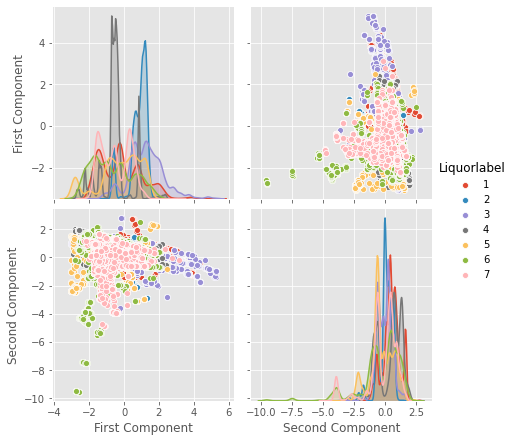

In [0]:
import seaborn as sns
sns.pairplot(pcaydf, height=3, hue= 'Liquorlabel', vars = ['First Component', 'Second Component'])

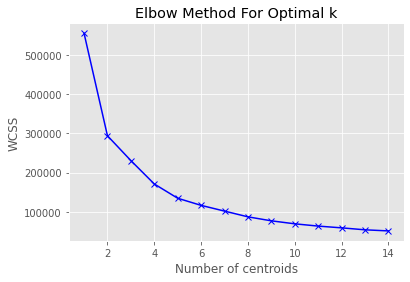

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

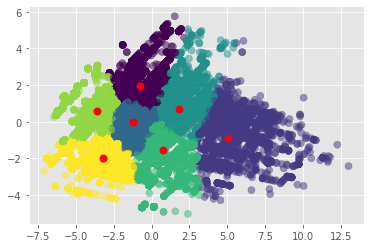

In [0]:
#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First Component','Second Component']
#build our algorithm with k=7, train it on pca and make predictions
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0).fit(pca)
y_kmeans = kmeans.predict(pca)
newfeature = kmeans.labels_
X1CV = np.column_stack((X1_train_res,pd.get_dummies(newfeature)))
#plotting the results 
plt.scatter(pca['First Component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

In [0]:
y_kmeans

array([0, 3, 6, ..., 2, 3, 6], dtype=int32)

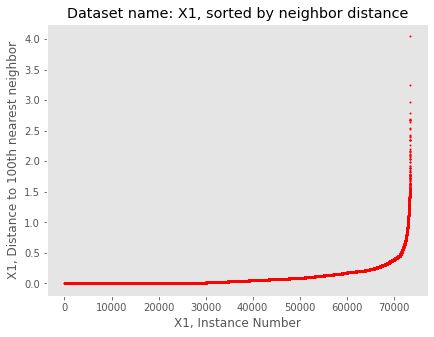

In [0]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X1_N = 100
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X1_knn_graph = kneighbors_graph(pca, X1_N, mode='distance') # calculate distance to four nearest neighbors


N1 = X1_knn_graph.shape[0]
X1_4nn_distances = np.zeros((N1,1))
for i in range(N1):
    X1_4nn_distances[i] = X1_knn_graph[i,:].max()

X1_4nn_distances = np.sort(X1_4nn_distances, axis=0)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N1), X1_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X1, sorted by neighbor distance')
plt.xlabel('X1, Instance Number')
plt.ylabel('X1, Distance to {0}th nearest neighbor'.format(X1_N))
plt.grid()

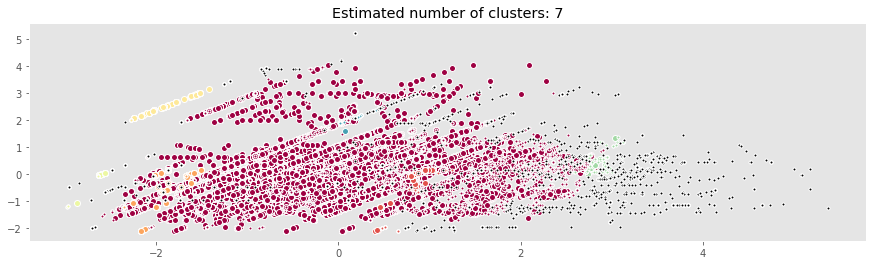

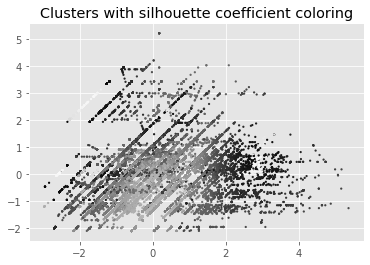

CPU times: user 1min 17s, sys: 5.5 s, total: 1min 23s
Wall time: 1min 8s


In [0]:
%%time 

from sklearn.cluster import DBSCAN

#=====================================
# ENTER YOUR CODE HERE TO CHANGE MINPTS AND EPS FOR EACH DATASET
X1_minpts = X1_N # from above
X1_eps = .375
#=====================================



db = DBSCAN(eps=X1_eps, min_samples=X1_minpts).fit(pca)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# mark the samples that are considered "core"
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(15,4))
unique_labels = set(labels) # the unique labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X1_train_res[class_member_mask & core_samples_mask]
        # plot the core points in this class
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy = X1_train_res[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.grid()
plt.show()

silhouette_per_sample = metrics.silhouette_samples(X1_train_res, labels)

plt.figure()
plt.scatter(X1_train_res[:, 0], X1_train_res[:, 1], c=silhouette_per_sample,
                cmap=plt.cm.gray, s=5, linewidths=0)
plt.title('Clusters with silhouette coefficient coloring')
plt.show()

In [0]:
from sklearn import metrics

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y1_train_res, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y1_train_res, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y1_train_res, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y1_train_res, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y1_train_res, labels, average_method='arithmetic'))
#print("Silhouette Coefficient: %0.3f"
     # % metrics.silhouette_score(y1_train_res, labels))

Estimated number of clusters: 7
Homogeneity: 0.016
Completeness: 0.094
V-measure: 0.028
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.028


One of the major challenges with clusters is evaluating the performance of the clusters beyond a subjective eye level test. For our evaluation models, we will want to exploy a series of scores that we can calculate using the Y values we created using the SMOTE test as well as the labels we defined in the function above. These measures include Homogeneity, Completeness, V-Measure, Adjsuted Rand Index, and Adjusted Mutural Information.

Regarding the Homogeneity score, we can see that we are very close to Zero on the Homeogeneity score, which would suggest that our model is very far from being perfectly homogenous. Our score of 0.016, shows that we are seeing a variety of sizes in our clusters, even after we ran a SMOTE to balance the variables.

Regarding completeness, a cluster is considered to be complete if all the data points are memebers of a given class are elements of the same cluster. Our score of 0.094 sugests that we are not seeing a lot of alignment between clusters and join performance.

With the V-measure for evaluating clustering performance, we are using the homogeneity and completeness varaibles we calculated previously to give us a score that is independent of class labels, number of clusters and size of the data. In our case, we recieved a score of 0.028 which aligns with our completeness and homogeneity score that our cluster is not surfacing a missing variable.

The Rand Index is a measure of similarity between data clusterings, our score of 0.001, shows that we are very far from having similar data clusters.

Adjusted mutual information, is another measure to compare clusters by correcting the effect of the agreement of the clusters solely due to chance between clusterings. Our score of 0.028 suggests that there is very limited similarity between our clusters.

In [0]:
pca=pd.DataFrame(projected)
pca.columns=['First Component','Second Component']
#pcasubset=pca.sample(n=30000)

In [0]:
%%time
# an example using precomputed affinity, which uses the actual proximity graph
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors

# See below for all avaiable parameters: 
#   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
neigh2 = NearestNeighbors(10, algorithm='ball_tree', n_jobs=-1)
neigh2.fit(pca)
Xknn = neigh2.kneighbors_graph()

spc = SpectralClustering(n_clusters=7, affinity = 'precomputed')
labels = spc.fit_predict(Xknn) 



CPU times: user 1h 45min 18s, sys: 1h 7min 1s, total: 2h 52min 20s
Wall time: 1h 26min 37s


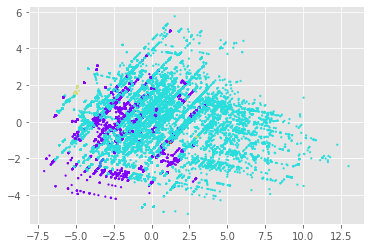

In [0]:
plt.scatter(pca['First Component'], pca['Second Component'], c=labels,
                    cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()

In [0]:
#My Drive/ColabNotebooks/')
url_rfmodel = '/content/drive/My Drive/Colab Notebooks/spc1.joblib'
#exporting model to drive
from joblib import dump, load
dump(spc, url_rfmodel) 

['/content/drive/My Drive/Colab Notebooks/spc1.joblib']

### Clustering with LDA

In [0]:
ldaydf = X_train_ldadf.merge(ydf, left_index=True, right_index=True)

In [0]:
ldaydf = ldaydf.rename(columns={0: 'Liquorlabel'})

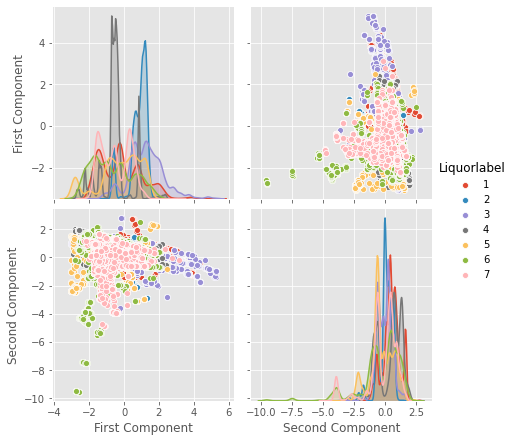

In [0]:
import seaborn as sns
sns.pairplot(ldaydf, height=3, hue= 'Liquorlabel', vars = ['First Component', 'Second Component'])

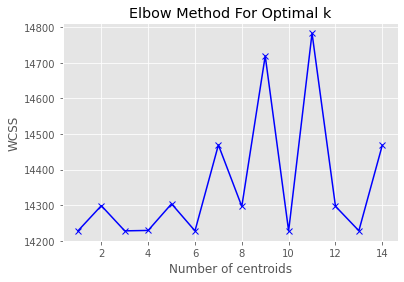

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss2 = []
K2 = range(1,15)
for k in K2:
    km2 = KMeans(n_clusters=k)
    km2 = km.fit(X_train_lda)
    wcss2.append(km2.inertia_)
plt.plot(K2, wcss2, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

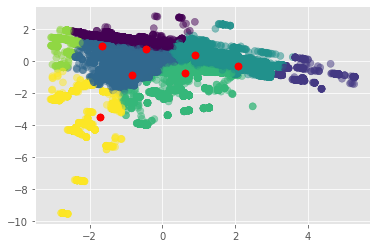

In [0]:
from sklearn.cluster import KMeans

#converting our projected array to pandas df

#build our algorithm with k=7, train it on pca and make predictions
kmeanslda = KMeans(n_clusters=7, init='k-means++', random_state=0).fit(X_train_ldadf)
y_kmeanslda = kmeans.predict(X_train_ldadf)
newfeaturelda = kmeanslda.labels_
X1CVLDA = np.column_stack((X1_train_res,pd.get_dummies(newfeaturelda)))
#plotting the results 
plt.scatter(X_train_ldadf['First Component'], X_train_ldadf['Second Component'], c=y_kmeanslda, s=50, alpha=0.5,cmap='viridis')
centerslda = kmeanslda.cluster_centers_
plt.scatter(centerslda[:, 0], centerslda[:, 1], c='red', s=50)
plt.scatter(centerslda[:, 0], centerslda[:, 1], c='red', s=50)

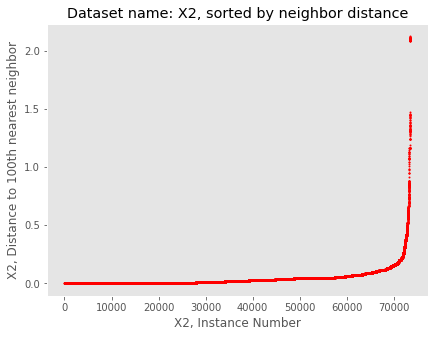

In [0]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X2_N = 100
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X2_knn_graph = kneighbors_graph(X_train_ldadf, X2_N, mode='distance') # calculate distance to four nearest neighbors


N2 = X2_knn_graph.shape[0]
X2_4nn_distances = np.zeros((N1,1))
for i in range(N2):
    X2_4nn_distances[i] = X2_knn_graph[i,:].max()

X2_4nn_distances = np.sort(X2_4nn_distances, axis=0)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N2), X2_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X2, sorted by neighbor distance')
plt.xlabel('X2, Instance Number')
plt.ylabel('X2, Distance to {0}th nearest neighbor'.format(X2_N))
plt.grid()

In [0]:
%%time 

from sklearn.cluster import DBSCAN

#=====================================
# ENTER YOUR CODE HERE TO CHANGE MINPTS AND EPS FOR EACH DATASET
X2_minpts = X2_N # from above
X2_eps = .375
#=====================================



db2 = DBSCAN(eps=X2_eps, min_samples=X2_minpts).fit(X_train_ldadf)
labels2 = db2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)

# mark the samples that are considered "core"
core_samples_mask2 = np.zeros_like(db2.labels_, dtype=bool)
core_samples_mask2[db2.core_sample_indices_] = True

plt.figure(figsize=(15,4))
unique_labels2 = set(labels2) # the unique labels
colors2 = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels2)))


CPU times: user 7.12 s, sys: 1.02 s, total: 8.14 s
Wall time: 8.17 s


<Figure size 1080x288 with 0 Axes>

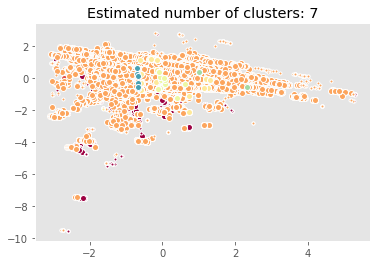

In [0]:
for k, col in zip(unique_labels2, colors2):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask2 = (labels == k)

        xy2 = X_train_ldadf[class_member_mask2 & core_samples_mask2]
#        print(xy2['First Component'], xy2['Second Component'])
        # plot the core points in this class
        plt.plot(xy2['First Component'], xy2['Second Component'], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy2 = X_train_ldadf[class_member_mask2 & ~core_samples_mask2]
        plt.plot(xy2['First Component'], xy2['Second Component'], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.grid()
plt.show()

In [0]:

%%time
# an example using precomputed affinity, which uses the actual proximity graph
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors

# See below for all avaiable parameters: 
#   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
neighlda = NearestNeighbors(10, algorithm='ball_tree', n_jobs=-1)
neighlda.fit(X_train_ldadf)
Xknnlda = neighlda.kneighbors_graph()

spclda = SpectralClustering(n_clusters=7, affinity = 'precomputed')
labelslda = spclda.fit_predict(Xknnlda) 



KeyboardInterrupt: ignored

In [0]:
plt.scatter(X_train_ldadf['First Component'], X_train_ldadf['Second Component'], c=labelslda,
                    cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()

## Modeling and Evaluation 2 (10 points)

Evaluate and Compare (10 Points)
• Eval: Use internal and/or external validation measures to describe and compare the
clusterings and the clusters— how did you determine a suitable number of clusters for each
method? 


We are now going to work on quantifying our clustering  so that it can be compared to other potential clustering methods. While the dataset includes labels for each liquor type (which we used as 1 - 7 denoting Whiskey, Gin, Rum, ect.), the labeling is strictly nominal and not ordinal despite what the numbers may indicate. Originally, we had 10 different clusters which included Brandy and Schnapps, however since they represented such a small portion of the total dataset, so we dropped those for ease of analysis and to reduce the total size of our SMOTE. However, following the SMOTE, we ended up having balanced distributions of our liquor types. 

That said, this will be a good set up for our clustering analysis. For this example, we will rely on the silhouette metic, which is a measure of the closeness of a point to the average a tthe center of it's clustercombined with the smallest distance between the same point and the next closest cluster. This will be useful to allow us to quanitfy how useful our clustering. The optimal at 1.0, so higher values are desired. Among our 70,000 records, which is a subset of 17 million records from 2012 to 2019,  we will use an average of the silhouetts score for each of the points. 


#### GMM Clustering

This metric will allow us to compare teh efficacy of GMM to other clustering methods as well as fine-tune the parameters of each cluster model. 

In [27]:
from sklearn.metrics import silhouette_score

# Get silhouette score
gmm_sil = silhouette_score(gmm_X, gmm_clusters, random_state=123456789)
print("Average GMM Silhouette Score:", gmm_sil)

Average GMM Silhouette Score: -0.03753422405346133


As we discussed in Modeling and Evaluation 1, we noticed a drastic increase from -0.038 to 0.13 switchinf rom full to tied covariance. Doing this changes our model from using general covariance matrices for each clusters (full) to using a single general covaraiance for the entire clustering. We will also be testing our sperical and diagonal clustering types which contrsain the shared covariance matrix to the aforementioned type of matrix. The diagonal and spherical cluster proved to be the best clustering performer with a silhouette of over 0.27, due to it constraining the shared covariance matrix to the aforementioned type of matrix. 

The ranking of the covariance types in terms of silhouette score was as follows:

Spherical Cluster > Diagonal Cluster > Tied Covariance = 3 Iteration Initialization > 10 item initialization > Random > Initial, We will use Spherical Clustering Moving forward. 

In [28]:
# Get silhouette score
gmm_sil_tied = silhouette_score(gmm_X_tied, gmm_clusters_tied, random_state=123456789)
print("Average GMM (tied) Silhouette Score:", gmm_sil_tied)

Average GMM (tied) Silhouette Score: 0.13256179167147136


In [29]:
# Get silhouette score
gmm_sil_sphere = silhouette_score(gmm_X_sphere, gmm_clusters_sphere, random_state=123456789)
print("Average GMM (spherical) Silhouette Score:", gmm_sil_sphere)

Average GMM (spherical) Silhouette Score: 0.2790954702484921


In [30]:
# Get silhouette score
gmm_sil_diag = silhouette_score(gmm_X_diag, gmm_clusters_diag, random_state=123456789)
print("Average GMM (diagonal) Silhouette Score:", gmm_sil_diag)

Average GMM (diagonal) Silhouette Score: 0.27439858931739075


As discussed previously, next we are testing the random instantiation of our initial clusters as opposed to k-means initialization. These all ran relatively quickly on the 70k observations we used. However, we achieved some relatively low silhouette scores, producing values that are very close to zero at 0.000673 for Random initialization. 

In [31]:
# Get silhouette score
gmm_sil_rand = silhouette_score(gmm_X_rand, gmm_clusters_rand, random_state=123456789)
print("Average GMM (tied, random initialization) Silhouette Score:", gmm_sil_rand)

Average GMM (tied, random initialization) Silhouette Score: 0.0006728586404024266


Next, we want to test to see if we can improve our clustering fit by performing more iterations of GMM during initilization. We are going to test both 3 iterations and 10 iterations to see if we can further improve our clustering. 

In [32]:
# Get silhouette score
gmm_sil_3init = silhouette_score(gmm_X_3init, gmm_clusters_3init, random_state=123456789)
print("Average GMM (3 k-means iterations) Silhouette Score:", gmm_sil_3init)

Average GMM (3 k-means iterations) Silhouette Score: 0.13256179167147136


In [33]:
# Get silhouette score
gmm_sil_10init = silhouette_score(gmm_X_10init, gmm_clusters_10init, random_state=123456789)
print("Average GMM (10 k-means iterations) Silhouette Score:", gmm_sil_10init)

Average GMM (10 k-means iterations) Silhouette Score: 0.12509796981099913


Incorporating the 3 and 10 iteration clustering, we were not able to sigificantly improve our performance using spherical and diagonal clustering.

In [34]:
gmm_sils = (gmm_sil, gmm_sil_tied, gmm_sil_sphere, gmm_sil_diag, gmm_sil_rand, gmm_sil_3init, gmm_sil_10init)
names = ('Initial',
         'Tied Covariance',
         'Spherical Covariance',
         'Diagonal Covariance',
         'Random Initialization',
         '3 Iteration Initialization (Final)',
         '10 Iteration Initialization'
        )
gmm_sil_dict = {names[i]: gmm_sils[i] for i in range(len(gmm_sils))}
gmm_sil_table = pd.DataFrame.from_dict(gmm_sil_dict, orient='index', columns=['Slihouette Score'])

gmm_sil_table

,Slihouette Score
Initial,-0.037534
Tied Covariance,0.132562
Spherical Covariance,0.279095
Diagonal Covariance,0.274399
Random Initialization,0.000673
3 Iteration Initialization (Final),0.132562
10 Iteration Initialization,0.125098


Based on the previous tests, our GMM clustering will have the following parameters. 

Spherical Covariance type
Random Intialization
3 initialization iterations

In [0]:
gmm_X_final = gmm_X_sphere.copy()
gmm_clusters_final = gmm_clusters_sphere
gmm_sil_final = gmm_sil_sphere

### KMeans Clustering

#### Configuration 1: 'init' parameter set to k-means++

In [37]:
# config 1
from sklearn.metrics import silhouette_score

# Get silhouette score
kms_sil = silhouette_score(kms_X, kms_clusters, random_state=1)
print("Average GMM Silhouette Score:", kms_sil)
df_kms_result.loc[0, 'SilhouetteScore'] = kms_sil

Average GMM Silhouette Score: 0.31137717087495753


Using a default configuration, the new Kmeans clustering methodology was able to improve upon all of our previous scores within the Liquor Category dataset and the GMM model.Here, we exceeded our spherical performance at 0.31, which we will look to improve upon below. 

#### Configuration 2: 'init' parameter set to random (and coincidentally n_init set to 5 to compare with the next configuration)

In [38]:
# config 2
from sklearn.metrics import silhouette_score

# Get silhouette score
kms2_sil = silhouette_score(kms_X, kms_clusters2, random_state=1)
print("Average GMM Silhouette Score:", kms2_sil)
df_kms_result.loc[1, 'SilhouetteScore'] = kms2_sil

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Average GMM Silhouette Score: 0.3215995782622546


Just by changing to random, the silhouette score increased slightly from 0.31 to 0.32. While we were able to garner a better performance, the time it took to run this model was longer than the GMM model, which was almost instantaneous, which can be costly if we want to extend this model to support the 17 million line dataset for Iowa liquors. 

#### Configuration 3: 'n_init' parameter set to 1 (with init = k-means++)

In [39]:
# config 3
from sklearn.metrics import silhouette_score

# Get silhouette score
kms3_sil = silhouette_score(kms_X, kms_clusters3, random_state=1)
print("Average GMM Silhouette Score:", kms3_sil)
df_kms_result.loc[2, 'SilhouetteScore'] = kms3_sil

Average GMM Silhouette Score: 0.31137717087495753


In our dataset, reducing the iterations also reduces the potential of finding a higher score. 

#### Configuration 4: 'n_init' parameter set to 1 (with init = random as this turned out better)

In [41]:
# config 4
from sklearn.metrics import silhouette_score

# Get silhouette score
kms4_sil = silhouette_score(kms_X, kms_clusters4, random_state=1)
print("Average GMM Silhouette Score:", kms4_sil)
df_kms_result.loc[3, 'SilhouetteScore'] = kms4_sil

Average GMM Silhouette Score: 0.24996803582646263


Reducing the n_init in the case where init = random did not improve the score at the help of improvind the time. 

#### Configuration 5: tol as default higher than default (using best so far 'n_init' parameter set to 1 & init = random as this turned out better)

In [42]:
# config 5
from sklearn.metrics import silhouette_score

# Get silhouette score
kms5_sil = silhouette_score(kms_X, kms_clusters5, random_state=1)
print("Average GMM Silhouette Score:", kms5_sil)
df_kms_result.loc[4, 'SilhouetteScore'] = kms5_sil

Average GMM Silhouette Score: 0.24353079162750804


Reducing the tolerance here also reduces the score.

#### Configuration 6: tol as default lower than default (using best so far 'n_init' parameter set to 1 & init = random as this turned out better)


In [43]:
# config 6
from sklearn.metrics import silhouette_score

# Get silhouette score
kms6_sil = silhouette_score(kms_X, kms_clusters6, random_state=1)
print("Average GMM Silhouette Score:", kms6_sil)
df_kms_result.loc[5, 'SilhouetteScore'] = kms6_sil

Average GMM Silhouette Score: 0.24995408127289595


Here, the increasing tolerances does increase the score as opposed to reducing the tolerance which we did in config 5. So we will keep our tolerance at default since that does not improve the score by increasing or decreasing. 

In [44]:
df_kms_result

,Configuration,SilhouetteScore,RelativeTime
0,Config 1,0.311377,Medium
1,Config 2,0.3216,Medium High
2,Config 3,0.311377,Very Short
3,Config 4,0.249968,Short
4,Config 5,0.243531,Very Short
5,Config 6,0.249954,Medium Low


As per our results, config 3 was among the most accurate of the scores we found as far as silhouette, while also being very short in relative time to run. We are going to choose this over Config 2, which was a little more accurate and significantly longer to run.

## Modeling and Evaluation 3 (10 points)

Visualize Results
• Visualize: Use tables/visualization to discuss the found results. Explain each visualization in
detail.  

Shown below are two visuals of the kmeans and GMM clusters that we ran on our liquor store dataset. This was done to help to illustrate the clusters visually, 

In [50]:
#pip install plotly
#pip install chart_studio
#pip install plotly --upgrade

In [68]:
import plotly
#import plotly.plotly as py
import chart_studio
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
import pandas as pd
import numpy as np

# Set up plotly API key
chart_studio.tools.set_credentials_file(username='dclark18', api_key='hXJo0VMcaO7tvJPK0mTv')

# Enable offline plots (embed into ipynb)
init_notebook_mode(connected=True)

# Define list of possible users
possible_users = set(data_final.User.unique())

# Define dictionary of all possible user/class combinations (which ones took pictures of which)
possible_classes = {usr: set(data_final.where(data_final.User == usr).Class.dropna().unique()) for usr in possible_users}

# Define functions to create 3D-interactive plots of each user/position combo
def parse_coords(cls=1, usr=1):
    """ Helper function: return all coords for specified User and Class
    
    cls (int): Class (defaults to 1)
    usr (int): User (defaults to 1)
    
    Ret (dict): {dimension (str): coordinates (pd.Series)}
    """
    dims = X2.columns
    fill = lambda suffix: [suffix + str(i) for i in range(1,11)]
    cols = {col: fill(col) for col in dims}
    coords = {dim: data_final[cols[dim]].where(data_final.User == usr).where(data_final.Class == cls).stack() for dim in dims}
    return coords

def plot_3d(cls=1, usr=1, title=None, allpts=False, clusters=np.array([0])):
    """ Return 3D interactive plot for given coordinates set (single user/sign combos)
    
    cls (int): Class (defaults to 1)
    usr (int): User (defaults to 1)
    title (str): Title of the plot (defaults to "User {usr} Position {cls}")
    allpts (bool): Whether or not this is meant to cluster all points in the dataset (df2)
        All 600k+ points is too many to plot interactively; this will sample 20,000 points randomly and graph them
    clusters (np.array): Clusters to use for color-coding (only valid for allpts at this time)
    
    Ret (plotly.graph_objs.Scatter3d figure object)
    """
    
    # Make sure user/class designation is valid
    if not usr in possible_users:
        return "ERROR: User %d does not have any data. Try again with a different user specified." % usr
    elif not cls in possible_classes[usr]:
        return "ERROR: User %d does not have any data for Class %d. Try again with a different class specified." % (usr, cls)
    
    # Process points to draw
    if allpts:
        # Sample 20,000 random coords w/o replacement
        coords = X1_train_res.copy()
        if clusters.any():
            coords['cluster'] = clusters
        coords = coords.sample(n=20000, replace=False)
    else:
        coords = parse_coords(cls, usr)
        
    # Name plot if title not provided (default behavior)
    if not title:
        if allpts:
            title = "20,000 Random Points from Dataset"
            if clusters.any():
                title += " (Clustered)"
        else:
            title = "User %d Position %d" % (usr, cls)

    # Color-code clustered points, if provided
    if allpts and clusters.any():
        marker_params = dict(size=5,
                             color=coords.cluster,
                             colorscale='Portland'
                             )
    else:
        marker_params = dict(size=5)
            
    data = [go.Scatter3d(x=coords['X'],
                         y=coords['Y'],
                         z=coords['Z'],
                         mode='markers',
                         marker=marker_params
                         )
            ]

    layout = dict(width=800,
                  height=700,
                  autosize=True,
                  title=title,
                  scene=dict(xaxis=dict(gridcolor='rgb(255, 255, 255)',
                                        zerolinecolor='rgb(255, 255, 255)',
                                        showbackground=True,
                                        backgroundcolor='rgb(230, 230,230)'
                                        ),
                             yaxis=dict(gridcolor='rgb(255, 255, 255)',
                                        zerolinecolor='rgb(255, 255, 255)',
                                        showbackground=True,
                                        backgroundcolor='rgb(230, 230,230)'
                                        ),
                             zaxis=dict(gridcolor='rgb(255, 255, 255)',
                                        zerolinecolor='rgb(255, 255, 255)',
                                        showbackground=True,
                                        backgroundcolor='rgb(230, 230,230)'
                                        ),
                             camera=dict(up=dict(x=0,
                                                 y=0,
                                                 z=1
                                                 ),
                                         eye=dict(x=-1.7428,
                                                  y=1.0707,
                                                  z=0.7100,
                                                  )
                                         ),
                             aspectratio = dict(x=1,
                                                y=1,
                                                z=0.7
                                                ),
                             aspectmode = 'manual'
                             ),
                )

    fig = dict(data=data, layout=layout)

    return py.iplot(fig, filename="Hands-%s" % title)

AttributeError: ignored

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

In [54]:
plot_3d(cls=1, usr=1)

NameError: ignored

#### K-means Silhouette Plot


cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

For n_clusters = 7 The average silhouette_score is : 0.31137717087495753


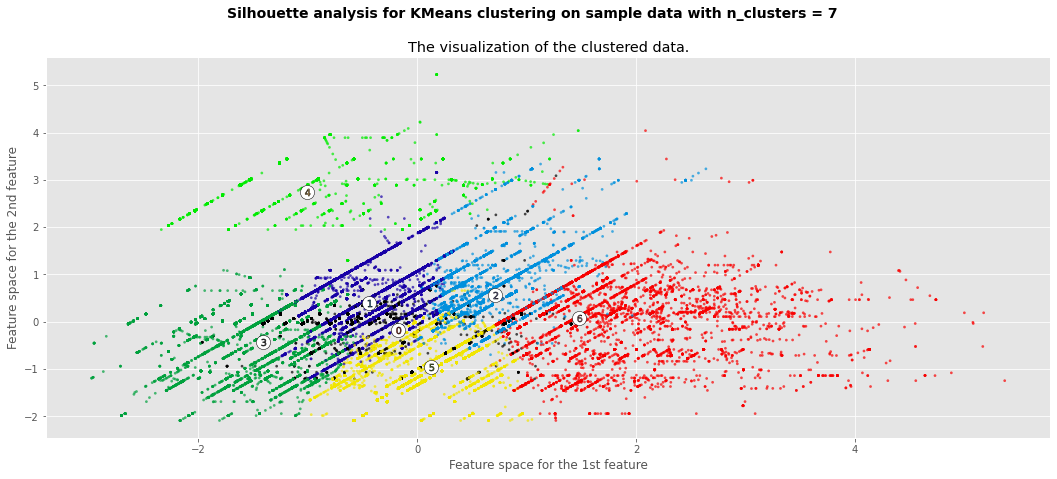

In [70]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

dfb = data_final.copy()
df3s = data_final[['id_label']]

X = kms_X.values[:,]
y = df3s[['id_label']]
clusterer = kms
random_state=123456789
silhouette_avg = kms_sil

range_n_clusters = [7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax2) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a rsample_size=50andom generator
    # seed of 10 for reproducibility.
    clusterer = clusterer #KMeans(n_clusters=11, init='k-means++',random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_avg
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    #ax1.set_title("The silhouette plot for the various clusters.")
    #ax1.set_xlabel("The silhouette coefficient values")
    #ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    #ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    #ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### GMM Silhouette Plot


cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

For n_clusters = 7 The average silhouette_score is : 0.2790954702484921


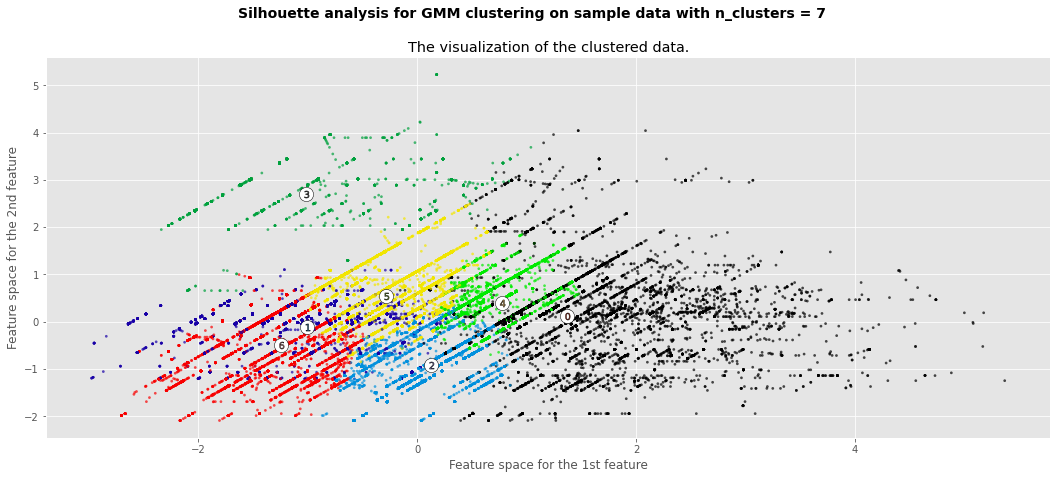

In [75]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

df2b = data_final.copy()
df3s = df2b[['id_label']]
 
X = gmm_X.values[:,]
y = df3s[['id_label']]
clusterer = gmm_sphere
random_state=123456789
silhouette_avg = gmm_sil_sphere

range_n_clusters = [7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax2) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a rsample_size=50andom generator
    # seed of 10 for reproducibility.
    clusterer = clusterer #gmm(n_clusters=11, init='k-means++',random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = gmm_sil_sphere #silhouette_score(X, cluster_labels, sample_size=sample_size, random_state=random_state)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #ax1.set_title("The silhouette plot for the various clusters.")
    #ax1.set_xlabel("The silhouette coefficient values")
    #ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    #ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    #ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for GMM clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Modeling and Evaluation 4 (20 points)

Summarize the Ramifications
• Summarize: Describe your results. What findings are the most interesting and why

Option B: Association Rule Mining    
• Train: Create frequent itemsets and association rules (adjust parameters).  
• Eval: Use several measures for evaluating how interesting different rules are.  
• Visualize: Use tables/visualization to discuss the found results.  
• Summarize: Describe your results. What findings are the most compelling and why?    
Option C: Collaborative Filtering     
• Train: Create user-item matrices or item-item matrices using collaborative filtering (adjust
parameters).  
• Eval: Determine performance of the recommendations using different performance
measures (explain the ramifications of each measure). 
MSDS 7331 Course Overview & Schedule 29  
• Visualize: Use tables/visualization to discuss the found results. Explain each visualization in
detail.      

## Deployment (10 points)



Be critical of your performance and tell the reader how you current model might be usable by
other parties.  
• Did you achieve your goals? If not, can you reign in the utility of your modeling?  
• How useful is your model for interested parties (i.e., the companies or organizations that
might want to use it)?  
• How would you deploy your model for interested parties?  
• What other data should be collected?  
• How often would the model need to be updated, etc.?  

https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html
Interactive	Get Coffee	Over Lunch	Overnight
AffinityPropagation	2000	10000	25000	100000
Spectral	2000	5000	25000	75000
Agglomerative	2000	10000	25000	100000
DeBaCl	5000	25000	75000	250000
ScipySingleLinkage	25000	50000	100000	250000
Fastcluster	50000	100000	500000	1000000
HDBSCAN	100000	500000	1000000	5000000
DBSCAN	75000	250000	1000000	2500000
SKLearn KMeans	1000000000	1000000000	1000000000	1000000000

## Exceptional Work (10 points)


You have free reign to provide additional analyses or combine analyses